# 전국 신규 민간 아파트 분양가격 동향

* 2015년 10월부터 2018년 7월까지
* 주택분양보증을 받아 분양한 전체 민간 신규아파트 분양가격 동향
* https://www.data.go.kr/dataset/3035522/fileData.do
* 이 튜토리얼은 아파트 분양가에 대한 분석보다 `파이썬 데이터 분석 방법`을 배우는데 목적을 두고 있습니다.
* 이 튜토리얼에서는 파이썬 데이터분석 도구인 Pandas를 활용합니다. Pandas에 대한 간략한 소개는 [판다스 10분 완성](https://dataitgirls2.github.io/10minutes2pandas/) 문서를 참고해 주시면 좋습니다.
* 또 시각화 도구로는 `grammer of graphics` 문법을 활용할 수 있는 `plotnine`을 사용합니다.
* 이 튜토리얼은 `데잇걸즈 2기`와 `파이콘 한국 2018`에서 진행되기도 했습니다.
* 온라인 분석도구인 [Colaboratory](https://goo.gl/jSr7WU)의 사본을 생성해서 직접 실행하는 실습을 진행해 보실 수도 있습니다.
* [데이터 다운로드](https://goo.gl/oJydAv)

## !중요

### 버전과 한글 폰트
* [한글폰트 사용하기](http://corazzon.github.io/matplotlib_font_setting)

In [7]:
# 아래의 버전에 의존성이 있습니다. 
# 다음의 버전으로 설치해 주세요.
# !pip install plotnine==0.5.0
# !pip install pandas
# !pip install folium==0.5.0
# !pip install statsmodels -U
# 시각화 도구 설치
# !pip install plotnine
# !pip install missingno

## 아나콘다 사용시
* [Plotnine 설치](https://anaconda.org/conda-forge/plotnine)
* [missingno 설치](https://anaconda.org/conda-forge/missingno)

In [8]:
!pip show plotnine

Name: plotnine
Version: 0.5.0
Summary: A grammar of graphics for python
Home-page: https://github.com/has2k1/plotnine
Author: None
Author-email: None
License: GPL-2
Location: /Users/kmpak/repo/data-analysis-note/venv/lib/python3.7/site-packages
Requires: descartes, matplotlib, scipy, patsy, mizani, numpy, statsmodels, pandas
Required-by: 


In [9]:
!pip show missingno

Name: missingno
Version: 0.4.2
Summary: Missing data visualization module for Python.
Home-page: https://github.com/ResidentMario/missingno
Author: Aleksey Bilogur
Author-email: aleksey.bilogur@gmail.com
License: UNKNOWN
Location: /Users/kmpak/repo/data-analysis-note/venv/lib/python3.7/site-packages
Requires: scipy, matplotlib, numpy, seaborn
Required-by: 


In [11]:
import warnings
warnings.filterwarnings('ignore')

In [12]:
import pandas as pd
import numpy as np
import re

In [14]:
from plotnine import *

%을 사용하면 터미널에서 사용할 수 있는 유닉스 명령어를 사용하실 수 있습니다. 경로를 불러오는 문제가 있을 때 이 방법을 사용하면 좋습니다.

In [15]:
# 현재 위치정보를 봅니다.
%pwd

'/Users/kmpak/repo/data-analysis-note/note'

In [16]:
# data 폴더 아래에 apt_price 라는 폴더를 만들어 공공데이터 포털에서 다운로드 받은 데이터를 모아 두었습니다. 해당 파일을 확인해 봅니다.
%ls apt_data/

전국 평균 분양가격(2013년 9월부터 2015년 8월까지).csv
주택도시보증공사_전국 평균 분양가격(2019년 9월).csv


In [19]:
pre_sale = pd.read_csv('apt_data/주택도시보증공사_전국 평균 분양가격(2019년 9월).csv', encoding='euc-kr', engine='python')
pre_sale.shape

(4080, 5)

In [20]:
pre_sale.head()

,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,전체,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,서울,전용면적 102㎡초과,2015,10,5879


In [21]:
pre_sale.tail()

,지역명,규모구분,연도,월,분양가격(㎡)
4075,제주,전체,2019,9,3869
4076,제주,전용면적 60㎡이하,2019,9,3804
4077,제주,전용면적 60㎡초과 85㎡이하,2019,9,3884
4078,제주,전용면적 85㎡초과 102㎡이하,2019,9,NaN
4079,제주,전용면적 102㎡초과,2019,9,3601


In [22]:
# 분양가격에 결측치가 많이 있어요.
pre_sale.isnull().sum()

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    253
dtype: int64

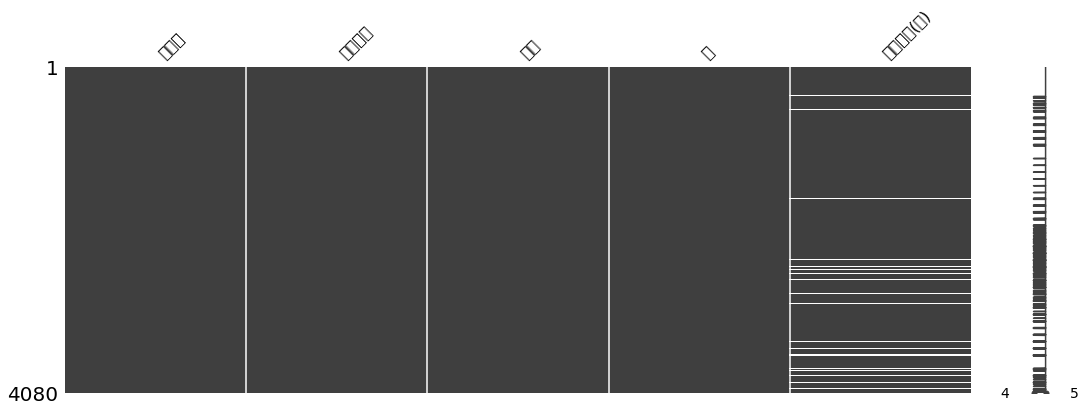

In [29]:
import missingno as msno
msno.matrix(pre_sale, figsize=(18,6))

In [30]:
# 연도와 월은 카테고리 형태의 데이터이기 때문에 스트링 형태로 변경
pre_sale['연도'] = pre_sale['연도'].astype(str)
pre_sale['월'] = pre_sale['월'].astype(str)

In [31]:
pre_sale_price = pre_sale['분양가격(㎡)']

In [32]:
# 분양가격의 타입을 숫자로 변경해 줍니다.
pre_sale['분양가격'] = pd.to_numeric(pre_sale_price, errors='coerce')
# 평당 분양가격을 구해볼까요
pre_sale['평당분양가격'] = pre_sale['분양가격'] * 3.3

In [33]:
pre_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4080 entries, 0 to 4079
Data columns (total 7 columns):
지역명        4080 non-null object
규모구분       4080 non-null object
연도         4080 non-null object
월          4080 non-null object
분양가격(㎡)    3827 non-null object
분양가격       3726 non-null float64
평당분양가격     3726 non-null float64
dtypes: float64(2), object(5)
memory usage: 223.2+ KB


In [34]:
pre_sale.isnull().sum()

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    253
분양가격       354
평당분양가격     354
dtype: int64

In [35]:
pre_sale.describe()

,분양가격,평당분양가격
count,3726.000000,3726.000000
mean,3201.605743,10565.298953
std,1223.855504,4038.723163
min,1868.000000,6164.400000
25%,2418.500000,7981.050000
50%,2855.000000,9421.500000
75%,3508.000000,11576.400000
max,12728.000000,42002.400000


In [36]:
pre_sale.describe(include=[np.object])

,지역명,규모구분,연도,월,분양가격(㎡)
count,4080,4080,4080,4080,3827
unique,17,5,5,12,1676
top,울산,전용면적 85㎡초과 102㎡이하,2017,12,2221
freq,240,816,1020,340,17


In [37]:
# 2017년 데이터만 봅니다.
pre_sale_2017 = pre_sale.loc[pre_sale['연도'] == '2017']
pre_sale_2017.shape

(1020, 7)

In [38]:
# 같은 값을 갖고 있는 걸로 시도별로 동일하게 데이터가 들어 있는 것을 확인할 수 있습니다.
pre_sale['규모구분'].value_counts()

전용면적 85㎡초과 102㎡이하    816
전용면적 102㎡초과          816
전용면적 60㎡초과 85㎡이하     816
전체                   816
전용면적 60㎡이하           816
Name: 규모구분, dtype: int64

In [39]:
pre_sale['지역명'].value_counts()

울산    240
부산    240
충북    240
광주    240
전북    240
제주    240
대전    240
세종    240
서울    240
강원    240
대구    240
경남    240
전남    240
경북    240
인천    240
충남    240
경기    240
Name: 지역명, dtype: int64